### JPEG Algoritması

JPEG algoritması, görüntü sıkıştırma için kullanılan en yaygın algoritmalardan biridir. Temel adımları şu şekildedir:

1. Renk bilgisi RGB türünde ifade edilmişse, YUV’a çevirme (isteğe bağlı)
2. Örneklemeyi azaltma (down-sampling)
3. Görüntüyü 8×8 büyüklüğünde bloklara bölme
4. DCT kullanarak, piksel bilgisini zaman etki alanından frekans etki alanına çevirme
5. DCT dönüşümü sonuç değerlerine nicelendirme
6. Sonuç katsayılara köşegen tarama düzeninde RLE uygulama ve ardından QM kodlamasını kullanma

Bu adımların tersini uygulayarak görüntüyü geri elde edebiliriz.

[68 71 76]


(72, 66, 3)

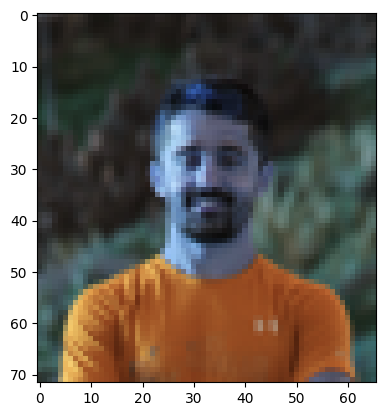

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# read image and store as matrix
img = cv2.imread('profil_resmi.png')

print(img[0][0])
# show img
plt.imshow(img)
img.shape

[70.673  2.621 -2.345]


(72, 66, 3)

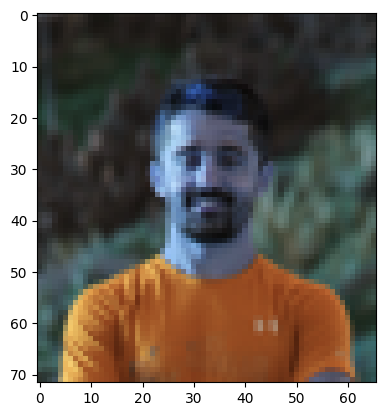

In [51]:
# replace rgb values to yuv values, y is luminance, u and v are chrominance
# formula for rgb to yuv is: Y = 0.299R + 0.587G + 0.114B, U = -0.147R - 0.289G + 0.436B, V = 0.615R - 0.515G - 0.100B

# create empty matrix for yuv values
yuv_img = np.zeros(img.shape)

# replace rgb values to yuv values
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        yuv_img[i,j,0] = 0.299*img[i,j,0] + 0.587*img[i,j,1] + 0.114*img[i,j,2]
        yuv_img[i,j,1] = -0.147*img[i,j,0] - 0.289*img[i,j,1] + 0.436*img[i,j,2]
        yuv_img[i,j,2] = 0.615*img[i,j,0] - 0.515*img[i,j,1] - 0.100*img[i,j,2]

# show yuv image
print(yuv_img[0][0])
# show matrix using matplotlib
plt.imshow(img)
yuv_img.shape

[0. 0. 0.]


(72, 66, 3)

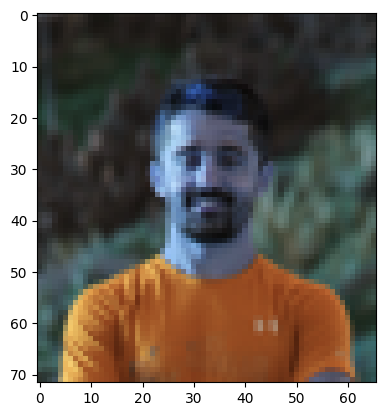

In [52]:
# down sample u and v values
# create empty matrix for down sampled yuv values
down_sampled_yuv_img = np.zeros(yuv_img.shape)

# down sample u and v values
for i in range(yuv_img.shape[0]):
    for j in range(yuv_img.shape[1]):
        if i%2 == 0 and j%2 == 0:
            down_sampled_yuv_img[i,j,0] = yuv_img[i,j,0]
            down_sampled_yuv_img[i,j,1] = yuv_img[i,j,1]
            down_sampled_yuv_img[i,j,2] = yuv_img[i,j,2]
        else:
            down_sampled_yuv_img[i,j,0] = 0
            down_sampled_yuv_img[i,j,1] = 0
            down_sampled_yuv_img[i,j,2] = 0

# show down sampled yuv image
print(down_sampled_yuv_img[3][3])
# show matrix using matplotlib
plt.imshow(img)
down_sampled_yuv_img.shape

In [56]:
def dct(block):
    # create empty matrix for dct values
    dct_block = np.zeros(block.shape)
    # calculate dct values
    for u in range(block.shape[0]):
        for v in range(block.shape[1]):
            if u == 0:
                cu = 1/np.sqrt(2)
            else:
                cu = 1
            if v == 0:
                cv = 1/np.sqrt(2)
            else:
                cv = 1
            sum = 0
            for i in range(block.shape[0]):
                for j in range(block.shape[1]):
                    sum += block[i,j]*np.cos(((2*i+1)*u*np.pi)/16)*np.cos(((2*j+1)*v*np.pi)/16)
            dct_block[u,v] = 0.25*cu*cv*sum
    return dct_block

first_block = np.zeros((8,8,3))
for i in range(8):
    for j in range(8):
        for k in range(3):
            first_block[i,j,k] = yuv_img[i,j,k]

dct_block = dct(first_block)
print(dct_block[0][0])


[317.657375 -10.347625  12.473125]


[81.898875 -2.041125  2.720625]


(72, 66, 3)

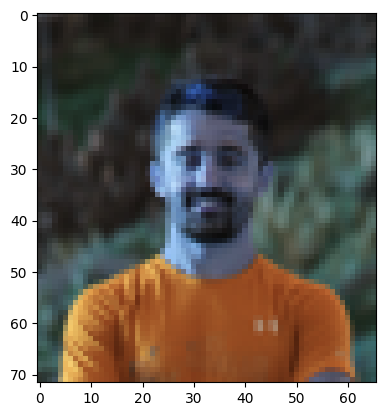

In [55]:
# part image to 8x8 blocks and apply dct to each block
# create empty matrix for dct values
dct_img = np.zeros(down_sampled_yuv_img.shape)

# part image to 8x8 blocks and apply dct to each block

for i in range(down_sampled_yuv_img.shape[0]):
    for j in range(down_sampled_yuv_img.shape[1]):
        for k in range(down_sampled_yuv_img.shape[2]):
            if i%8 == 0 and j%8 == 0:
                dct_img[i:i+8,j:j+8,k] = dct(down_sampled_yuv_img[i:i+8,j:j+8,k])
            else:
                dct_img[i,j,k] = 0

# show dct image
print(dct_img[0][0])
# show matrix using matplotlib
plt.imshow(img)
dct_img.shape

[80. -0.  0.]


(72, 66, 3)

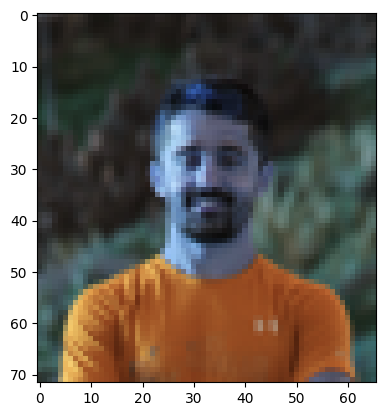

In [57]:
# quantize dct values
# create empty matrix for quantized dct values
quantized_dct_img = np.zeros(dct_img.shape)

# quantize dct values
for i in range(dct_img.shape[0]):
    for j in range(dct_img.shape[1]):
        for k in range(dct_img.shape[2]):
            if i%8 == 0 and j%8 == 0:
                quantized_dct_img[i,j,k] = np.round(dct_img[i,j,k]/10)*10
            else:
                quantized_dct_img[i,j,k] = 0

# show quantized dct image
print(quantized_dct_img[0][0])
# show matrix using matplotlib
plt.imshow(img)
quantized_dct_img.shape

['[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 0. 0.]', '[0. 

['[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0.]',
 '[0. 0. 0

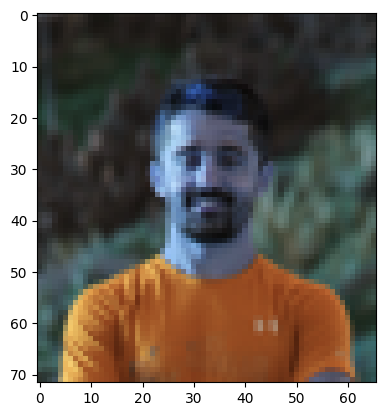

In [60]:
# compress quantized dct values with rle algorithm zigzag
# create empty dictionary for rle
rle_list = []

# compress quantized dct values with rle algorithm zigzag
for i in range(quantized_dct_img.shape[0]):
    for j in range(quantized_dct_img.shape[1]):
        pixel = str(quantized_dct_img[i,j])
        sum = i + j
        pixel_dict = {pixel: 1}
        if pixel_dict in rle_list:
            pixel_dict[pixel] += 1
        if sum % 2 == 0:
            rle_list.insert(0, pixel_dict)
        else:
            rle_list.append(pixel_dict)
                

# show rle dictionary
print(rle_list)
# show matrix using matplotlib
plt.imshow(img)
rle_list